In [2]:
import json
from pathlib import Path
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from shapely.ops import unary_union
import pandas as pd

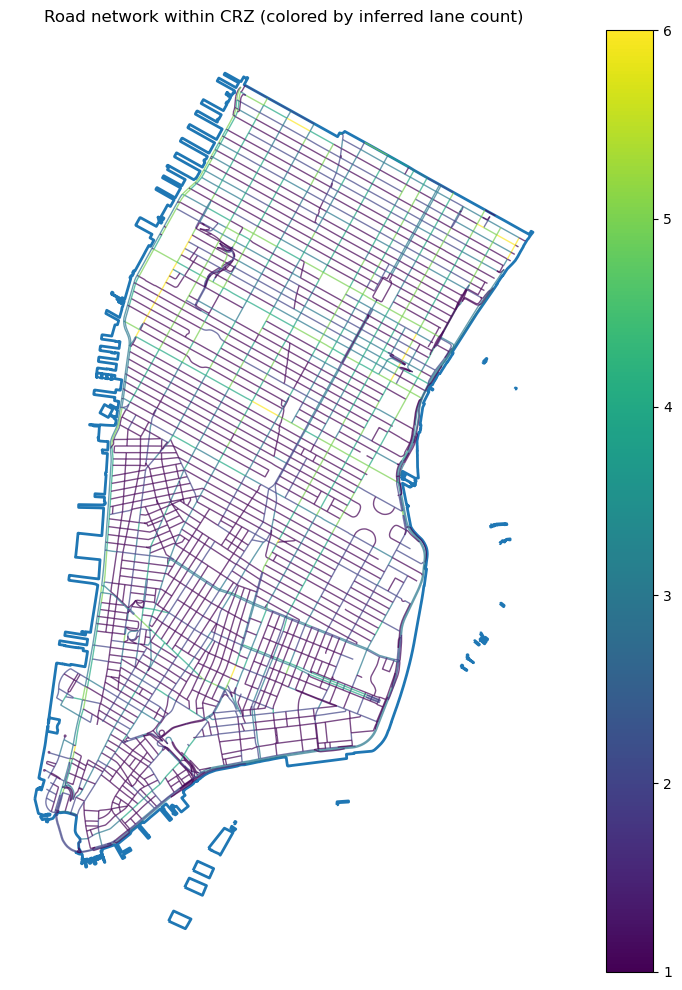

In [4]:
CRZ_GEOJSON_PATH = Path(
    r"CRZ_boundary.geojson"
)
DEFAULT_LANES_BY_HIGHWAY = {
    "residential":      2.651522216,
    "secondary":        5.440003892,
    "primary":          6.247019072,
    "trunk":            7.130002402,
    "motorway_link":    3.08989439,
    "unclassified":     3.125536473,
    "tertiary":         3.935009563,
    "motorway":         4.974022942,
    "living_street":    1.996870524,
    "trunk_link":       3.120110194,
    "secondary_link":   2.995305787,
    "primary_link":     2.795618734,
    "tertiary_link":    1.996870524,
}



def safe_int_from_val(val, default=1):

    if val is None:
        return default

    if isinstance(val, list):
        if not val:
            return default
        return safe_int_from_val(val[0], default=default)

    if isinstance(val, (int, float)):
        try:
            return int(round(float(val)))
        except Exception:
            return default
    if isinstance(val, str):
        s = val.split(";")[0].strip()
        if s == "":
            return default
        try:
            return int(float(s))
        except Exception:
            return default

    return default


def infer_default_lanes(highway, oneway):
    hw = highway if isinstance(highway, str) else None
    base = DEFAULT_LANES_BY_HIGHWAY.get(hw, 1)
    return base


def parse_lanes_with_infer(data):
    lanes = data.get("lanes", None)
    if lanes is not None:
        return safe_int_from_val(lanes, default=1)
    lf = data.get("lanes:forward", None)
    lb = data.get("lanes:backward", None)
    if lf is not None or lb is not None:
        lf_int = safe_int_from_val(lf, default=0)
        lb_int = safe_int_from_val(lb, default=0)
        val = lf_int + lb_int
        if val > 0:
            return val

    highway = data.get("highway", None)
    oneway = data.get("oneway", "no")
    default_lanes = infer_default_lanes(highway, oneway)
    return default_lanes


def main():
    if not CRZ_GEOJSON_PATH.exists():
        raise FileNotFoundError(f"GeoJSON not found: {CRZ_GEOJSON_PATH}")

    with open(CRZ_GEOJSON_PATH, "r", encoding="utf-8") as f:
        crz_geojson = json.load(f)

    polys = [shape(feat["geometry"]) for feat in crz_geojson["features"]]
    crz_polygon = unary_union(polys)
    print("Downloading OSM road network within CRZ polygon (network_type='drive') ...")
    G = ox.graph_from_polygon(crz_polygon, network_type="drive", simplify=True)
    Gu = G.to_undirected()
    edges = ox.graph_to_gdfs(Gu, nodes=False, edges=True)
    edges["lanes_est"] = edges.apply(parse_lanes_with_infer, axis=1)
    crz_gdf = gpd.GeoDataFrame({"geometry": [crz_polygon]}, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize=(10, 10))
    crz_gdf.boundary.plot(ax=ax, linewidth=2)
    edges.plot(
        ax=ax,
        column="lanes_est",
        linewidth=1,
        alpha=0.7,
        legend=True,
    )
    ax.set_title("Road network within CRZ (colored by inferred lane count)")
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


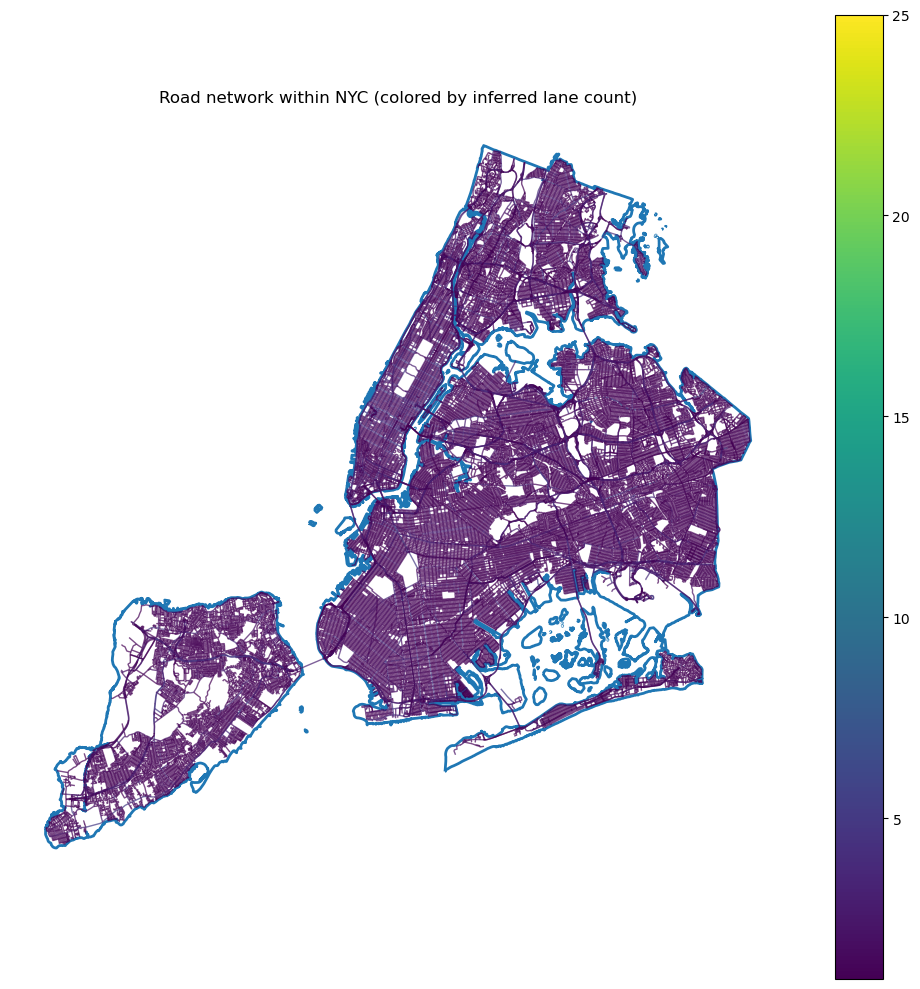

In [5]:
CRZ_GEOJSON_PATH = Path(
    r"NYC_Neighborhood_Tabulation_Areas_2020_-2131974656277759428.geojson"
)
s = 1.854935184
DEFAULT_LANES_BY_HIGHWAY = {
    "residential":     1.500687893 * s,
    "secondary":       2.523068948 * s,
    "primary":         3.040925574 * s,
    "tertiary":        1.90782241 * s,
    "motorway_link":   1.297082228 * s,
    "motorway":        2.899382171 * s,
    "unclassified":    1.805706522 * s,
    "trunk":           3.247139588 * s,
    "primary_link":    1.184549356 * s,
    "secondary_link":  1.184210526 * s,
    "tertiary_link":   1.319148936 * s,
    "trunk_link":      1.555555556 * s,
    "living_street":   1 * s,
    "busway":          1 * s,
}




def safe_int_from_val(val, default=1):

    if val is None:
        return default

    if isinstance(val, list):
        if not val:
            return default
        return safe_int_from_val(val[0], default=default)

    if isinstance(val, (int, float)):
        try:
            return int(round(float(val)))
        except Exception:
            return default
    if isinstance(val, str):
        s = val.split(";")[0].strip()
        if s == "":
            return default
        try:
            return int(float(s))
        except Exception:
            return default

    return default


def infer_default_lanes(highway, oneway):
    hw = highway if isinstance(highway, str) else None
    base = DEFAULT_LANES_BY_HIGHWAY.get(hw, 1)
    return base


def parse_lanes_with_infer(data):
    lanes = data.get("lanes", None)
    if lanes is not None:
        return safe_int_from_val(lanes, default=1)
    lf = data.get("lanes:forward", None)
    lb = data.get("lanes:backward", None)
    if lf is not None or lb is not None:
        lf_int = safe_int_from_val(lf, default=0)
        lb_int = safe_int_from_val(lb, default=0)
        val = lf_int + lb_int
        if val > 0:
            return val

    highway = data.get("highway", None)
    oneway = data.get("oneway", "no")
    default_lanes = infer_default_lanes(highway, oneway)
    return default_lanes


def main():
    if not CRZ_GEOJSON_PATH.exists():
        raise FileNotFoundError(f"GeoJSON not found: {CRZ_GEOJSON_PATH}")

    with open(CRZ_GEOJSON_PATH, "r", encoding="utf-8") as f:
        crz_geojson = json.load(f)

    polys = [shape(feat["geometry"]) for feat in crz_geojson["features"]]
    crz_polygon = unary_union(polys)
    print("Downloading OSM road network within CRZ polygon (network_type='drive') ...")
    G = ox.graph_from_polygon(crz_polygon, network_type="drive", simplify=True)
    Gu = G.to_undirected()
    edges = ox.graph_to_gdfs(Gu, nodes=False, edges=True)
    edges["lanes_est"] = edges.apply(parse_lanes_with_infer, axis=1)
    crz_gdf = gpd.GeoDataFrame({"geometry": [crz_polygon]}, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize=(10, 10))
    crz_gdf.boundary.plot(ax=ax, linewidth=2)
    edges.plot(
        ax=ax,
        column="lanes_est",
        linewidth=1,
        alpha=0.7,
        legend=True,
    )
    ax.set_title("Road network within NYC (colored by inferred lane count)")
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
